# 6.2 Exploring relationships

### This script contains the following:
#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
 #### Correlations
 #### Scatterplots
 #### Pair Plots
 #### Categorical Plots

### 1. Importing Visualization Libraries and Data

In [34]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [35]:
# Check version of matplotlib

matplotlib.__version__

'3.3.4'

In [36]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [37]:
# Define path

path = r'C:\Users\djval\Google Drive\Career\Career Foundry\Data Immerson\Achievement 6\01-2022 COVID 19 Impact on Trade Analysis\02 Data'

In [38]:
path

'C:\\Users\\djval\\Google Drive\\Career\\Career Foundry\\Data Immerson\\Achievement 6\\01-2022 COVID 19 Impact on Trade Analysis\\02 Data'

In [39]:
# Import data

df = pd.read_csv(os.path.join(path,'Prepared Data','continents - AAEUO 2020-2021.csv'))

### 2. Data Cleaning

In [40]:
df.shape

(192, 11)

In [41]:
df.columns

Index(['continent', 'year', 'month', 'US_imports', 'US_exports',
       'US_trade_deficit', 'US_ unemployment_rate', 'US_housing_price_index',
       'number_of_covid_cases_US', 'number_of_covid_deaths',
       'global_container_freight_index'],
      dtype='object')

In [42]:
df.dtypes

continent                          object
year                                int64
month                              object
US_imports                        float64
US_exports                        float64
US_trade_deficit                  float64
US_ unemployment_rate             float64
US_housing_price_index            float64
number_of_covid_cases_US            int64
number_of_covid_deaths              int64
global_container_freight_index      int64
dtype: object

In [21]:
df.head()

,continent,year,month,US_imports,US_exports,US_trade_deficit,US_ unemployment_rate,US_housing_price_index,number_of_covid_cases_US,number_of_covid_deaths,global_container_freight_index
0,Africa,2019,Jan,2662.223523,1725.373398,-936.850125,4.0,264.58,0,0,1324
1,Africa,2019,Feb,1742.160449,1927.257731,185.097282,3.8,266.36,0,0,1324
2,Africa,2019,Mar,2585.382645,2664.743811,79.361166,3.8,269.34,0,0,1324
3,Africa,2019,Apr,2605.059567,2247.018589,-358.040978,3.6,272.38,0,0,1324
4,Africa,2019,May,3332.941796,2389.686079,-943.255717,3.6,275.21,0,0,1324


#### Missing Values Check:

In [43]:
# Check for missing values

df.isnull().sum() # No missing values!

continent                         0
year                              0
month                             0
US_imports                        0
US_exports                        0
US_trade_deficit                  0
US_ unemployment_rate             0
US_housing_price_index            0
number_of_covid_cases_US          0
number_of_covid_deaths            0
global_container_freight_index    0
dtype: int64

#### Duplicates Check:

In [44]:
# Find duplicates

df_dups = df[df.duplicated()]

In [45]:
df_dups.shape # No duplicatess!

(0, 11)

#### Mixed-Type Data:

In [46]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# No mixed-type columns either!

### 3. Exploring Relationships

### Correlations:

In [47]:
# Pick out variables from your data set suitable for your exploratory visual analysis.

df.columns

Index(['continent', 'year', 'month', 'US_imports', 'US_exports',
       'US_trade_deficit', 'US_ unemployment_rate', 'US_housing_price_index',
       'number_of_covid_cases_US', 'number_of_covid_deaths',
       'global_container_freight_index'],
      dtype='object')

In [48]:
# Create a subset excluding continent and country. 

sub = df[['year', 'US_imports', 'US_exports','US_trade_deficit', 'US_ unemployment_rate', 'US_housing_price_index','number_of_covid_cases_US', 'number_of_covid_deaths','global_container_freight_index']]

In [49]:
# Create a correlation matrix using pandas

sub.corr()

,year,US_imports,US_exports,US_trade_deficit,US_ unemployment_rate,US_housing_price_index,number_of_covid_cases_US,number_of_covid_deaths,global_container_freight_index
year,1.000000,0.109298,0.147335,-0.058131,-0.477838,0.872879,0.309730,0.151740,0.814645
US_imports,0.109298,1.000000,0.907851,-0.873590,-0.108931,0.133340,0.061529,-0.012933,0.123244
US_exports,0.147335,0.907851,1.000000,-0.646103,-0.168794,0.161801,0.057474,-0.034904,0.150264
US_trade_deficit,-0.058131,-0.873590,-0.646103,1.000000,0.025444,-0.079395,-0.046095,-0.012990,-0.075001
US_ unemployment_rate,-0.477838,-0.108931,-0.168794,0.025444,1.000000,-0.477779,-0.207074,0.266668,-0.496165
US_housing_price_index,0.872879,0.133340,0.161801,-0.079395,-0.477779,1.000000,0.420879,0.094670,0.950582
number_of_covid_cases_US,0.309730,0.061529,0.057474,-0.046095,-0.207074,0.420879,1.000000,0.733463,0.424085
number_of_covid_deaths,0.151740,-0.012933,-0.034904,-0.012990,0.266668,0.094670,0.733463,1.000000,0.107777
global_container_freight_index,0.814645,0.123244,0.150264,-0.075001,-0.496165,0.950582,0.424085,0.107777,1.000000


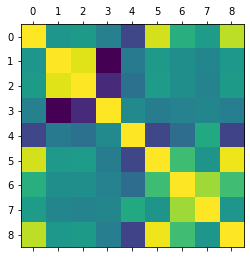

In [50]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

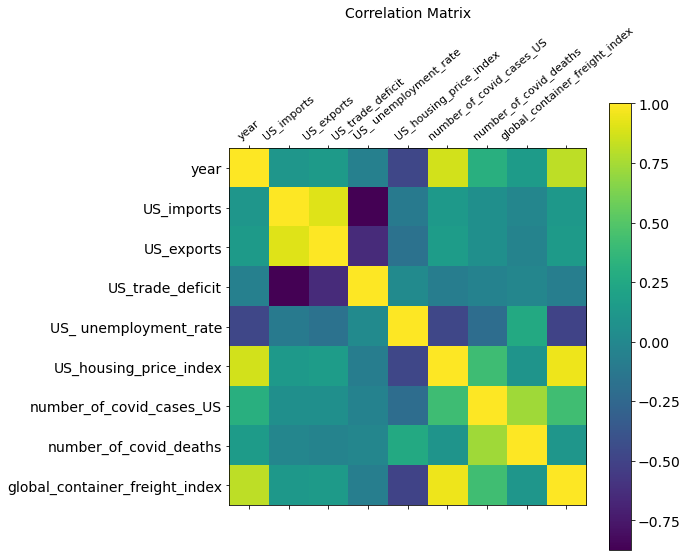

In [51]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=11, rotation=40) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#### Create a correlation heatmap using seaborn:

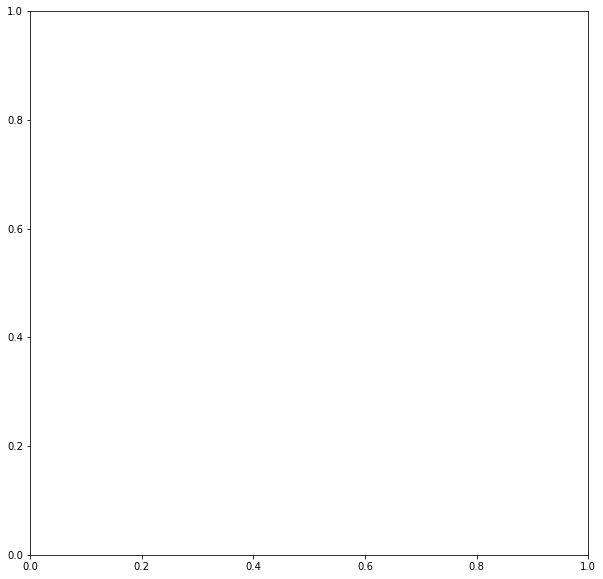

In [52]:
# Create a subplot with matplotlib. What it does is create an empty output, but this is okay—it's just to show the subplots.

f,ax = plt.subplots(figsize=(10,10))

In [53]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

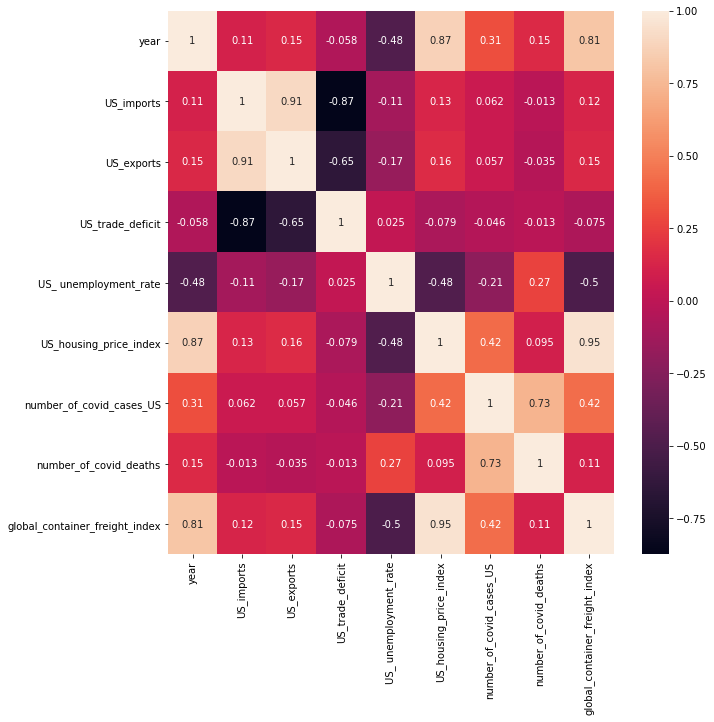

In [54]:
corr.figure

I am seeing a correlation between the US housing price index and the number of covid cases/deaths. The housing price index is could be an indication that there is an economic crisis in the US. 

### Scatterplots:

In [34]:
# Import data for North, South and Central America for 2019 - 2020

df_2 = pd.read_csv(os.path.join(path,'Prepared Data','continents - NSC AM 2019-2021.csv'))

In [26]:
df_2.columns

Index(['continent', 'year', 'month', 'US_imports', 'US_exports',
       'US_trade_deficit', 'US_ unemployment_rate', 'US_housing_price_index',
       'number_of_covid_cases_US', 'number_of_covid_deaths',
       'global_container_freight_index'],
      dtype='object')

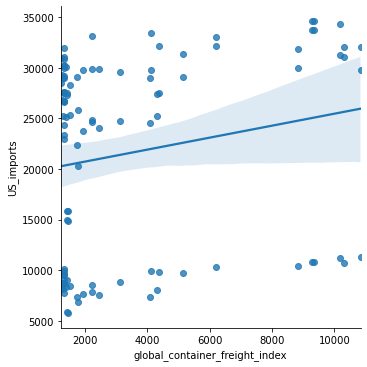

In [27]:
# Create a scatterplot for the "US imports" and "global_container_freight_index" columns in seaborn

sns.lmplot(x = 'global_container_freight_index', y = 'US_imports', data = df_2)

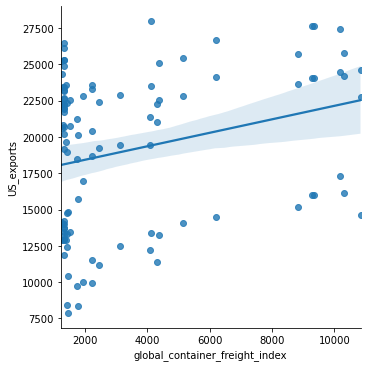

In [28]:
# Create a scatterplot for the "US exports" and "global_container_freight_index" columns in seaborn

sns.lmplot(x = 'global_container_freight_index', y = 'US_exports', data = df_2)

I am seeing that when the global cost of container freight goes up, the value of US imports and US exports to Canada, Mexico, South and Central America increase. This makes sense in order to save on freight.

In [29]:
# Import data for Africa, Asia, European Union and Oceania

df_3 = pd.read_csv(os.path.join(path,'Prepared Data','continents - AAEUO 2019-2021.csv'))

In [31]:
df_3.columns

Index(['continent', 'year', 'month', 'US_imports', 'US_exports',
       'US_trade_deficit', 'US_ unemployment_rate', 'US_housing_price_index',
       'number_of_covid_cases_US', 'number_of_covid_deaths',
       'global_container_freight_index'],
      dtype='object')

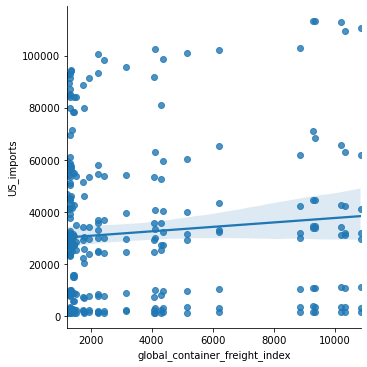

In [32]:
# Create a scatterplot for the "US imports" and "global_container_freight_index" columns in seaborn

sns.lmplot(x = 'global_container_freight_index', y = 'US_imports', data = df_3)

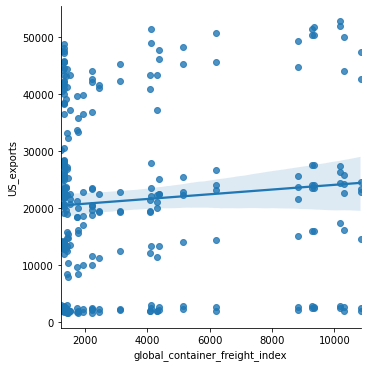

In [33]:
# Create a scatterplot for the "US exports" and "global_container_freight_index" columns in seaborn

sns.lmplot(x = 'global_container_freight_index', y = 'US_exports', data = df_3)

I believe the US imports and US Exports increase with Canada, Mexico, South and Central America, however, there still appears to be increase in trade with other continents for 2019-2021. I will need to investigate this more to understand what the US continues to trade even with higher container rates.

### Pair Plots:

In [39]:
# Keep only the variables you want to use in the pair plot

df_4 = df_2[['US_imports', 'US_exports', 'US_ unemployment_rate', 'global_container_freight_index']]

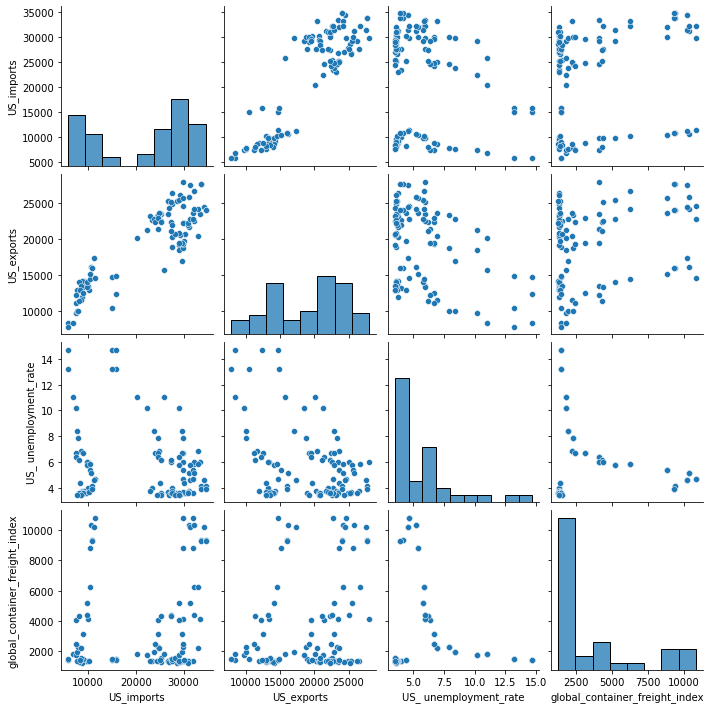

In [40]:
# Create a pair plot 

g = sns.pairplot(df_4)

### Categorical Plots:

##### Creating a categorical variable that splits the "global_container_freight_index" column into categories

C:\Users\djval\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='global_container_freight_index', ylabel='Density'>

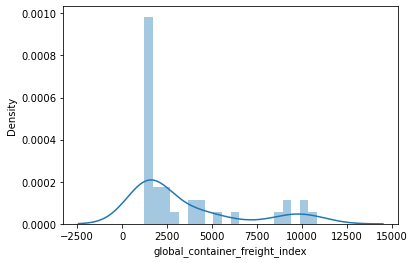

In [41]:
# Use a histogram to visualize the distribution of the variables. This way, you can determine sensible categories for the price ranges. You don't want to end up with too few observations in any one of the categories.

sns.distplot(df_4['global_container_freight_index'], bins = 20)

In [43]:
df_4.loc[df_4['global_container_freight_index'] < 2500, 'Freight category'] = 'Low freight rate'

C:\Users\djval\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [45]:
df_4.loc[(df_4['global_container_freight_index'] >= 2500) & (df_4['global_container_freight_index'] < 7500), 'Freight category'] = 'Middle freight rate'

C:\Users\djval\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [46]:
df_4.loc[df_4['global_container_freight_index'] >= 7500, 'Freight category'] = 'High freight rate'

C:\Users\djval\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [48]:
df_4['Freight category'].value_counts(dropna = False)

Low freight rate       69
Middle freight rate    21
High freight rate      18
Name: Freight category, dtype: int64

In [49]:
df_4.columns

Index(['US_imports', 'US_exports', 'US_ unemployment_rate',
       'global_container_freight_index', 'Freight category'],
      dtype='object')

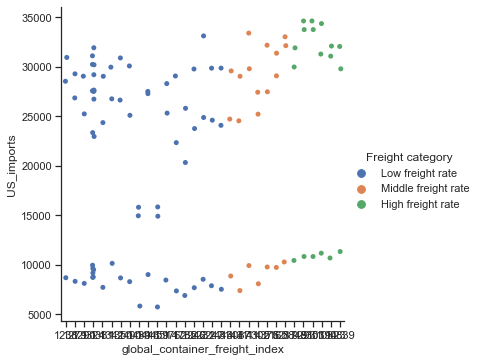

In [55]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="global_container_freight_index", y="US_imports", hue="Freight category", data=df_4)

# Hypothesis: If there is global pandemic, the US will increase its % of imports and exports with countries in North America, Central America and South America and decrease its % of intercontinental imports and exports.

#### When were the peaks of the Covid 19 pandemic in 2020 and 2021?

#### Which was the US' biggest trading partner prior to the pandemic

#### What products did the US increase its import/export with Canada, Mexico, and South and Central Mexico

#### What country did the US increase its % of imports and exports from 2020 to 2021

#### What were the businesses that were thriving during the pandemic

#### Was there product that the US could not import/export to Canada, Mexico, and South and Central Mexico
